# 1D Staggered Grid

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')  

from matplotlib import gridspec 

In [77]:
# Parameters
nt=1000
nx=1000
c0=500

dx=1
dt=0.001

rho0=2500 
mu0=rho0*c0**2.



stability_limit=0.8
eps=dt/dx*c0
eps

0.5

<IPython.core.display.Javascript object>


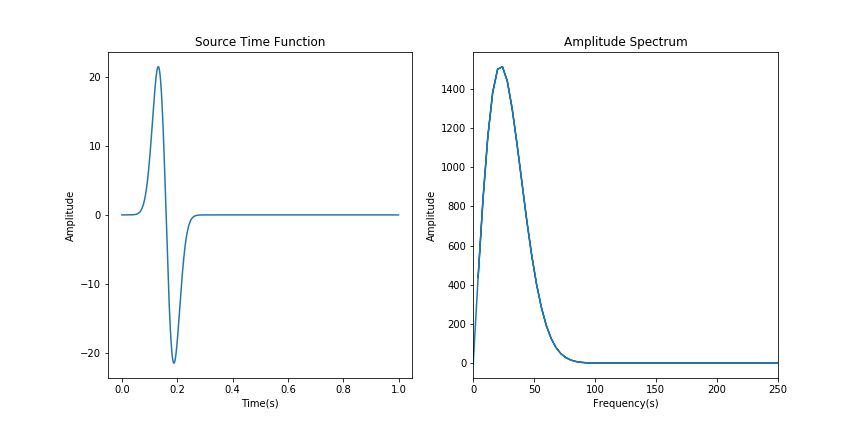

In [78]:
# source time function
isx=250
time=np.linspace(0.,dt*nt,nt)
f0=25.
t0=4./f0
src=-2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))
plt.ion()
fig1=plt.figure(figsize=[12,6])
gs1=gridspec.GridSpec(1,2)
axes1=plt.subplot(gs1[0])
axes1.set_title("Source Time Function")
axes1.set_xlabel("Time(s)")
axes1.set_ylabel("Amplitude")
axes1.plot(time,src)

axes2=plt.subplot(gs1[1])
axes2.set_title("Amplitude Spectrum")
axes2.set_xlabel("Frequency(s)")
axes2.set_ylabel("Amplitude")
axes2.set_xlim(0,250)
amp=np.fft.fft(src)
freq=np.fft.fftfreq(amp.size,d=dt/4.0)
axes2.plot(abs(freq),abs(amp))



<IPython.core.display.Javascript object>


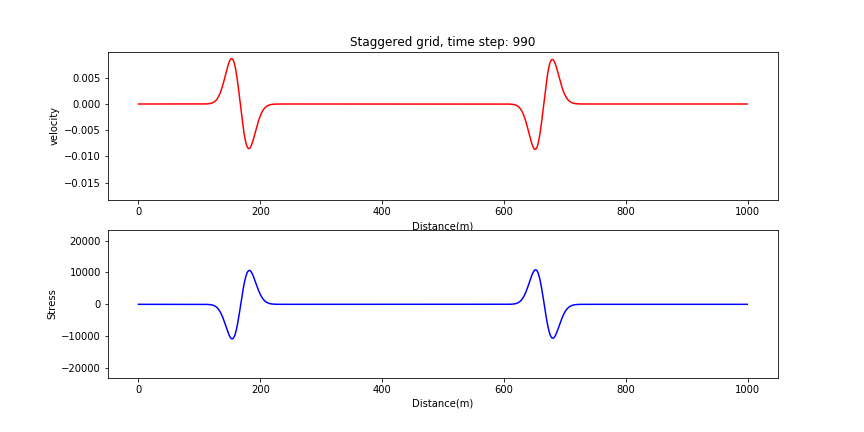

Text(0, 0.5, 'Stress')

In [79]:
# intialisation

#velocity
v=np.zeros(nx)
dv=np.zeros(nx)
vnew=np.zeros(nx)

#stress
st=np.zeros(nx)
dst=np.zeros(nx)
stnew=np.zeros(nx)

mu=np.zeros(nx)
mu=mu+mu0
rho=np.zeros(nx)
rho=rho+rho0
x = (np.arange(nx)*dx)   

title="Staggered grid"
fig2=plt.figure(figsize=[12,6])
gs2=gridspec.GridSpec(2,1)
ax1=plt.subplot(gs2[0])
ax1.set_title(title)
ax1.set_xlabel("Distance(m)")
ax1.set_ylabel("velocity")
line1 = ax1.plot(x, v, color = "red")

ax2=plt.subplot(gs2[1])
line2 = ax2.plot(x, st, color = "blue")
ax2.set_xlabel("Distance(m)")
ax2.set_ylabel("Stress")

In [80]:
isnap=10
for it in range(nt):
    for i in  range(2,nx-2):
        dst[i]=(st[i+1]-st[i])/dx
    v=v+dst*dt/rho
    v[isx] = v[isx] + dt * src[it] / (dt * rho[isx])
    
    for i in range(2,nx-2):
        dv[i]=(v[i]-v[i-1])
    st=st+dv*dt*mu    
    if not it % isnap: 
        for l in line1:
            l.remove()
            del l               
        for l in line2:
            l.remove()
            del l 
        line1 = ax1.plot(x, v, color = "red")
        line2 = ax2.plot(x, st, color = "blue")
    
        ax1.set_title(title + ", time step: %i" % (it))  
        plt.gcf().canvas.draw()
        
plt.ioff()
plt.show()